<a href="https://colab.research.google.com/github/taruma/vivaldi/blob/master/notebook/github_taruma_demo_lstm_rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Debit Aliran Menggunakan _Long Short-Term Memory_ (LSTM)

_Jupyter Notebook_ (selanjutnya disebut buku) ini hanya __contoh__ dan dibuat untuk __pembelajaran__ mengenai _Deep Learning/Neural Networks_ dan mendemonstrasikan penggunaan _Python_ di bidang sumberdaya air. Buku ini masih perlu dievaluasi kembali jika digunakan untuk kepentingan riset/penelitian ataupun proyek. 

Buku ini disertai catatan yang berisikan penjelasan lebih lanjut mengenai buku ini (daftar pustaka, penjelasan dataset, dll). Catatan dapat diunduh di bagian unduh buku.

## Pranala buku

Buku ini bisa diunduh dengan berbagai format. Versi Google Colab akan lebih diperbarui dibandingkan versi lainnya. 

- [Pranala Google Colab](https://colab.research.google.com/drive/1bx3ak_20dcJ7VdGR-djysLIxLaX7pRI2), format Google Colab versi terakhir
- [Pranala Github](https://github.com/taruma/vivaldi/blob/master/notebook/github_taruma_demo_lstm_rr.ipynb), format .ipynb versi 1.0.0
- [Lihat melalui NBViewer](https://nbviewer.jupyter.org/github/taruma/vivaldi/blob/master/notebook/github_taruma_demo_lstm_rr.ipynb), format .ipynb versi Github
- [Unduh Laporan](https://github.com/taruma/vivaldi/blob/master/pdf/taruma_lstm_rr_laporan.pdf?raw=true), format PDF versi 1.0.0 dengan _source code_ + _outputs_
- [Unduh Laporan (rapih)](https://github.com/taruma/vivaldi/blob/master/pdf/taruma_lstm_rr_laporan_rapih.pdf?raw=true), format PDF versi 1.0.0 hanya _outputs_*
- [Unduh Catatan](https://github.com/taruma/vivaldi/blob/master/pdf/taruma_lstm_rr_catatan.pdf?raw=true), format PDF versi 1.0.0

Pembuatan laporan dilakukan dengan mengubah buku ke dalam bentuk LaTeX dan dilakukan perubahan sedikit, sehingga disarankan untuk mengunduh versi laporan (rapih).

## Catatan

- Buku ini dikembangkan menggunakan [Google Colab](https://colab.research.google.com/), sehingga penampilan terbaik dan interaktif dari buku ini diperoleh jika dibuka melalui Google Colab.
- Anda dapat mendiskusikan mengenai buku ini (atau hal lainnya seperti koreksi, kritik, saran, pertanyaan, dll) melalui isu di _repository_ [taruma/vivaldi](https://github.com/taruma/vivaldi) atau dapat menghubungi saya melalui email $hi@taruma.info$.
- Buku ini masih perlu dievaluasi baik dari teori ataupun implementasi. Ini merupakan buku pribadi yang digunakan oleh saya sebagai latihan implementasi _Deep Learning_ menggunakan _Python_. Referensi materi pembelajaran saya dapat dilihat pada catatan buku. 
- __Biasakan untuk selalu memeriksa kode terlebih dahulu sebelum menjalankannya untuk masalah keamanan__.

# Deskripsi Kasus

Bagian ini menjelaskan gambaran umum mengenai dataset, permasalahan/tujuan, dan strategi penyelesaiannya.

## Dataset

Dataset merupakan data hidrologi dan klimatologi __harian__ dari tanggal __1 Januari 1998__ sampai __31 Desember 2008__ Daerah Aliran Sungai (DAS) Bendung Baru Pamarayan. Dataset terpisah menjadi 3 kategori yaitu: data curah hujan, data klimatologi, dan data debit.

- Data curah hujan diperoleh dari 8 stasiun yaitu: `bojong_manik`, `gunung_tunggal`, `pasir_ona`, `sampang_peundeuy`, `cimarga`, `bd_pamarayan`, `ciminyak_cilaki`, `gardu_tanjak`.
- Data debit diperoleh dari 1 stasiun yaitu: `bd_pamarayan`.
- Data klimatologi diperoleh dari 1 stasiun yaitu: `geofisika_serang`.

Rincian mengenai dataset bisa dibaca di catatan buku.

## Objektif

### Tujuan
- Peneliti ingin mengetahui nilai debit berdasarkan data hidrologi dan klimatologi yang tersedia pada waktu sebelumnya.

### Batasan Masalah
- Arsitektur (sel) _Recurrent Neural Networks_ yang akan digunakan adalah _Long Short-Term Memory_ (LSTM).
- Data yang hilang (`NaN`) diisi menggunakan metode interpolasi linear.
- Diasumsikan bahwa data tidak perlu diverifikasi.
- Jika data yang hilang lebih dari 1 tahun berurutan, maka paramater tersebut akan diabaikan.
- Pelatihan model (training) menggunakan data dari tahun __1998 - 2006__.
- Tidak dilakukan _feature engineering_, kolom yang bertipe ordinal atau kategori diabaikan.
- Tidak ada tahapan pemilihan model terbaik (_model selection_). Parameter akan sembarang mengikuti tulisan Kratzert et al (2018). 
- Berdasarkan Kratzert et al (2018), pada buku ini mengikuti bahwa dataset hanya dibagi dua bagian yaitu _train set_ dan _test set_, dimana validasi menggunakan _test set_.


### Pertanyaan
- Berapa nilai debit pada waktu $t$ jika telah diketahui nilai observasi pada waktu $timesteps$ hari sebelumnya?

# TAHAP 0: Pengaturan Awal dan Inisiasi

Pada tahap ini akan dilakukan pengaturan awal dan inisiasi dengan melakukan atau menjawab daftar berikut:

- Menentukan penggunaan _runtime_ lokal atau _Google Colab_.
- Menentukan nama buku/proyek dan versi (digunakan jika melakukan penyimpanan).
- Memeriksa paket hidrokit.
- Menampilkan versi paket yang digunakan pada sistem.
- Impor paket utama yang akan digunakan (numpy, pandas, matplotlib).


## Pengaturan Buku

In [0]:
#@title PENGGUNAAN RUNTIME (GOOGLE COLAB/LOKAL) { display-mode: "form" }
#@markdown Centang jika menggunakan sistem lokal.

_IS_LOCALE = False #@param {type:"boolean"}
_server = ['Google Colab', 'LOKAL']
print(':: INFORMASI RUNTIME')
print(':: Buku ini menggunakan RUNTIME: {}'.format(_server[_IS_LOCALE]).upper())

:: INFORMASI RUNTIME
:: BUKU INI MENGGUNAKAN RUNTIME: GOOGLE COLAB


In [0]:
#@title DESKRIPSI PROYEK { display-mode: "form" }
from datetime import datetime, timezone, timedelta

NOTEBOOK_NAME = 'taruma_demo_lstm_rr' #@param {type:"string"}
NOTEBOOK_VERSION = '1.0.0' #@param {type:"string"}
_current_time_jakarta = datetime.now(timezone(timedelta(hours=7)))
_prefix = _current_time_jakarta.strftime('%Y%m%d_%H%M')
project_title = f'{_prefix}_{NOTEBOOK_NAME}_{NOTEBOOK_VERSION.replace(".", "_")}'

print(':: INFORMASI PROYEK/BUKU')
print(f':: [project_title]: {project_title}')

:: INFORMASI PROYEK/BUKU
:: [project_title]: 20191022_0807_taruma_demo_lstm_rr_1_0_0


In [0]:
#@title MENGGUNAKAN TENSORFLOW 2.x (Google Colab)

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  print(':: MENGGUNAKAN TENSORFLOW 2.x (GOOGLE COLAB)')
  %tensorflow_version 2.x
except Exception:
  pass

:: MENGGUNAKAN TENSORFLOW 2.x (GOOGLE COLAB)
TensorFlow 2.x selected.


In [0]:
#@title PERIKSA PAKET HIDROKIT { display-mode: "form" }
#@markdown Memeriksa paket hidrokit dan memasangnya jika diperlukan.

print(':: memeriksa paket hidrokit'.upper())
if _IS_LOCALE:
    try:
        import hidrokit
    except ModuleNotFoundError:
        print('Hidrokit tidak ditemukan')
else:
    try:
        import hidrokit
    except ModuleNotFoundError:
        print(':: instalasi paket hidrokit'.upper())
        !pip install git+https://github.com/taruma/hidrokit.git@latest -q

:: MEMERIKSA PAKET HIDROKIT
:: INSTALASI PAKET HIDROKIT


In [0]:
#@title MENAMPILKAN VERSI PADA SISTEM
def _check_system():
    from numpy import __version__ as numpy_ver
    from pandas import __version__ as pandas_ver
    from matplotlib import __version__ as matplotlib_ver
    from tensorflow import __version__ as tensorflow_ver
    from tensorflow.keras import __version__ as keras_ver
    from hidrokit.__version__ import __version__ as hidrokit_ver
    from sys import version_info as python_info

    ALL_SYSTEM = 'python numpy pandas matplotlib tensorflow keras hidrokit'
    SYSTEM_INFO = {}
    
    print(':: INFORMASI VERSI SISTEM')
    for library in ALL_SYSTEM.split():
        if library.lower() == 'python':
            python_ver = '{}.{}.{}'.format(*python_info[:3])
        print(':: {:>12s} version: {:<10s}'.format(library, eval(library + '_ver')))
        SYSTEM_INFO[library] = eval(library + '_ver')
    
    return SYSTEM_INFO
_SYSTEM_INFO = _check_system()

:: INFORMASI VERSI SISTEM
::       python version: 3.6.8     
::        numpy version: 1.16.5    
::       pandas version: 0.24.2    
::   matplotlib version: 3.0.3     
::   tensorflow version: 2.0.0     
::        keras version: 2.2.4-tf  
::     hidrokit version: 0.3.2     


In [0]:
#@title LOKASI PENYIMPANAN DATASET
from pathlib import Path

if _IS_LOCALE:
    LOCAL_PATH = Path.home()
    if LOCAL_PATH.as_posix() != 'C:/Users/tarumainfo':
        raise Exception('BUBARKAN!')

    #@markdown ### Pengaturan sistem lokal
    #@markdown Isi alamat relatif terhadap `Pathlib.Path.home()`.
    _LOCAL_DROP = '_dropbox' #@param {type:"string"}
    _LOCAL_DATASET = '_dataset/_uma_pamarayan'  #@param {type:"string"}
    DROP_PATH = LOCAL_PATH / _LOCAL_DROP
    DATASET_PATH = LOCAL_PATH / _LOCAL_DATASET
else:
    # GOOGLE DRIVE
    from google.colab import drive
    drive.mount('/content/gdrive')

    #@markdown ### Pengaturan sistem lokal
    #@markdown Isi alamat relatif terhadap `/content/gdrive/My Drive/Colab Notebooks`.
    DRIVE_PATH = Path('/content/gdrive/My Drive/Colab Notebooks')
    _DRIVE_DROP = '_dropbox' #@param {type:"string"}
    _DRIVE_DATASET = '_dataset/uma_pamarayan' #@param {type:"string"}
    DROP_PATH = DRIVE_PATH / _DRIVE_DROP
    DATASET_PATH = DRIVE_PATH / _DRIVE_DATASET

#@markdown ---
#@markdown ##### Catatan: Gunakan variabel `DROP_PATH` dan `DATASET_PATH` saat berinteraksi dengan fungsi Input/Output (IO).

In [0]:
print(':: LOKASI PENYIMPANAN DATASET')
print(f'DATASET_PATH = {DATASET_PATH}')
print(f'DROP_PATH = {DROP_PATH}')

:: LOKASI PENYIMPANAN DATASET
DATASET_PATH = /content/gdrive/My Drive/Colab Notebooks/_dataset/uma_pamarayan
DROP_PATH = /content/gdrive/My Drive/Colab Notebooks/_dropbox


## Persiapan sistem

In [0]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(':: IMPORT LIBRARY (NUMPY, PANDAS, MATPLOTLIB)')

:: IMPORT LIBRARY (NUMPY, PANDAS, MATPLOTLIB)


# TAHAP 1: AKUISISI DATASET

Pada tahap ini, tujuan utamanya adalah membaca seluruh dataset yang dimiliki dan mengimpor dataset tersebut untuk pengolahan prapemrosesan data (_data preprocessing_).

## DATA HUJAN

Pada kasus ini, terdapat 8 stasiun yang akan digunakan sehingga terdapat 8 berkas excel. Setiap berkas memiliki data curah hujan dari tahun 1998 hingga 2008 yang disimpan pada masing-masing _sheet_ untuk setiap tahunnya. 

Untuk memperoleh data tersebut dalam bentuk tabel (bukan dalam bentuk pivot) digunakan modul yang tersedia di `hidrokit` (hanya pada versi 0.3.x). Modul dapat diakses melalui `hidrokit.contrib.taruma.hk43` ([panduan](https://nbviewer.jupyter.org/gist/taruma/a9dd4ea61db2526853b99600909e9c50)). 

In [0]:
from hidrokit.contrib.taruma import hk43

print(':: MEMBACA DATA HUJAN DARI [DATASET_PATH]')
hujan_raw, hujan_invalid = hk43.read_folder(
    DATASET_PATH, pattern='hujan_*', fmt='uma.hujan', prefix='hujan_',
    invalid=True
)

:: MEMBACA DATA HUJAN DARI [DATASET_PATH]
Found 8 file(s)
::  1  :	hujan_bojong_manik_1998_2008.xls
::  2  :	hujan_gunung_tunggal_1998_2008.xls
::  3  :	hujan_pasir_ona_1998_2008.xls
::  4  :	hujan_sampang_peundeuy_1998_2008.xls
::  5  :	hujan_cimarga_1998_2008.xls
::  6  :	hujan_bd_pamarayan_1998_2008.xls
::  7  :	hujan_ciminyak_cilaki_1998_2008.xls
::  8  :	hujan_gardu_tanjak_1998_2008.xls


In [0]:
print(f':: tipe [hujan_raw] = {type(hujan_raw)}')
print(f':: tipe [hujan_invalid] = {type(hujan_invalid)}')

:: tipe [hujan_raw] = <class 'dict'>
:: tipe [hujan_invalid] = <class 'dict'>


## DATA DEBIT

Untuk data debit, dilakukan hal yang serupa dengan data hujan.

In [0]:
print(':: MEMBACA DATA DEBIT DARI [DATASET_PATH]')
debit_raw, debit_invalid = hk43.read_folder(
    DATASET_PATH, pattern='debit_*', fmt='uma.debit', prefix='debit_',
    invalid=True
)

:: MEMBACA DATA DEBIT DARI [DATASET_PATH]
Found 1 file(s)
::  1  :	debit_bd_pamarayan_1998_2008.xls


In [0]:
print(f':: tipe [debit_raw] = {type(debit_raw)}')
print(f':: tipe [debit_invalid] = {type(debit_invalid)}')

:: tipe [debit_raw] = <class 'dict'>
:: tipe [debit_invalid] = <class 'dict'>


## DATA KLIMATOLOGI

Data klimatologi diperoleh dari situs data online bmkg. Data klimatologi dari bmkg lebih mudah di impor dikarenakan data sudah tersedia dalam bentuk tabel.

Digunakan modul `hidrokit.contrib.taruma.hk73` ([panduan](https://nbviewer.jupyter.org/gist/taruma/b00880905f297013f046dad95dc2e284)) agar memudahkan proses impornya.

In [0]:
from hidrokit.contrib.taruma import hk73

KLIMATOLOGI_PATH = DATASET_PATH / 'klimatologi_serang_1998_2008.xlsx'
print(f':: [KLIMATOLOGI_PATH] = {KLIMATOLOGI_PATH}')

print(':: MEMBACA DATA KLIMATOLOGI DARI [KLIMATOLOGI_PATH]')
df_klimatologi = hk73._read_bmkg(KLIMATOLOGI_PATH)
print(f':: tipe [df_klimatologi] = {type(df_klimatologi)}')

:: [KLIMATOLOGI_PATH] = /content/gdrive/My Drive/Colab Notebooks/_dataset/uma_pamarayan/klimatologi_serang_1998_2008.xlsx
:: MEMBACA DATA KLIMATOLOGI DARI [KLIMATOLOGI_PATH]
:: tipe [df_klimatologi] = <class 'pandas.core.frame.DataFrame'>


# TAHAP 2: PRAPEMROSESAN DATA

Pada tahap ini, dataset yang telah diimpor akan diperiksa dan dipersiapkan untuk pengolahan data di tahap selanjutnya. Berikut yang dilakukan pada tahap ini:

- Memastikan dataset berupa `pandas.DataFrame`.
- Memeriksa data yang invalid (salah input/bukan bilangan).
- Mengoreksi nilai yang invalid.
- Mengubah tipe data pada dataframe menjadi numerik. 
- Memeriksa data yang hilang (`NaN`).
- Mengisi nilai hilang dengan metode interpolasi linear.
- Menyesuaikan kelengkapan dataset.



## DATA HUJAN



In [0]:
print(':: MENGUBAH [hujan_raw] MENJADI [df_hujan] SEBAGAI DATAFRAME')
df_hujan = pd.DataFrame(hujan_raw, index=pd.date_range('19980101', '20081231'))
print(':: MENAMPILKAN [df_hujan]')
df_hujan.head()

:: MENGUBAH [hujan_raw] MENJADI [df_hujan] SEBAGAI DATAFRAME
:: MENAMPILKAN [df_hujan]


,hujan_bojong_manik,hujan_gunung_tunggal,hujan_pasir_ona,hujan_sampang_peundeuy,hujan_cimarga,hujan_bd_pamarayan,hujan_ciminyak_cilaki,hujan_gardu_tanjak
1998-01-01,-,-,-,NaN,-,-,-,-
1998-01-02,-,-,-,NaN,-,-,7,-
1998-01-03,5,-,-,-,-,64,-,5
1998-01-04,-,-,-,-,-,-,-,-
1998-01-05,-,-,-,-,-,-,-,-


In [0]:
print(':: MEMERIKSA NILAI INVALID PADA [df_hujan]')

print(':: MENAMPILKAN NILAI INVALID')
_hujan_invalid = list(hujan_invalid[list(hujan_invalid.keys())[0]].keys())
print(f':: NILAI INVALID BERUPA = {_hujan_invalid}')

:: MEMERIKSA NILAI INVALID PADA [df_hujan]
:: MENAMPILKAN NILAI INVALID
:: NILAI INVALID BERUPA = ['-', 'NaN']


Dari `hujan_invalid` diketahui bahwa pada data hujan memiliki data invalid berupa isian "`-`" dan "`NaN`". Isian "`-`" pada data curah hujan menandakan bahwa tidak ada hujan atau bernilai `0.`. Sedangkan data "`NaN`" menandakan bahwa data tidak terekam sama sekali sehingga tidak diketahui terjadi hujan atau tidak.

In [0]:
print(':: MENGOREKSI NILAI INVALID PADA [df_hujan]')
print(':: MENGOREKSI NILAI "-" MENJADI 0.0')
df_hujan[df_hujan == '-'] = 0.

:: MENGOREKSI NILAI INVALID PADA [df_hujan]
:: MENGOREKSI NILAI "-" MENJADI 0.0


In [0]:
print(":: MENGUBAH TIPE DATA PADA DATAFRAME [df_hujan]")
df_hujan = df_hujan.infer_objects()
print(":: MENAMPILKAN INFORMASI DATAFRAME [df_hujan]:")
df_hujan.info()

:: MENGUBAH TIPE DATA PADA DATAFRAME [df_hujan]
:: MENAMPILKAN INFORMASI DATAFRAME [df_hujan]:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 1998-01-01 to 2008-12-31
Freq: D
Data columns (total 8 columns):
hujan_bojong_manik        4017 non-null float64
hujan_gunung_tunggal      4018 non-null float64
hujan_pasir_ona           4018 non-null float64
hujan_sampang_peundeuy    4016 non-null float64
hujan_cimarga             4018 non-null float64
hujan_bd_pamarayan        4016 non-null float64
hujan_ciminyak_cilaki     4018 non-null float64
hujan_gardu_tanjak        4018 non-null float64
dtypes: float64(8)
memory usage: 282.5 KB


Dari informasi diatas diketahui bahwa tipe data pada dataframe telah diubah menjadi berbentuk numerik.

In [0]:
print(':: MENGISI NILAI HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR')
df_hujan.interpolate(method='linear', inplace=True)
df_hujan.bfill(inplace=True) # Mengatasi nilai hilang pada index [0, 1]

:: MENGISI NILAI HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR


In [0]:
print(':: MEMERIKSA JIKA [df_hujan] MASIH MEMILIKI NILAI YANG HILANG:', end=' ')
print(f'{df_hujan.isnull().values.any()}')

:: MEMERIKSA JIKA [df_hujan] MASIH MEMILIKI NILAI YANG HILANG: False


## DATA DEBIT

Langkahnya serupa dengan data hujan.

In [0]:
print(':: MENGUBAH [debit_raw] MENJADI [df_debit] SEBAGAI DATAFRAME')
df_debit = pd.DataFrame(debit_raw, index=pd.date_range('19980101', '20081231'))
print(':: MENAMPILKAN [df_debit]')
df_debit.head()

:: MENGUBAH [debit_raw] MENJADI [df_debit] SEBAGAI DATAFRAME
:: MENAMPILKAN [df_debit]


,debit_bd_pamarayan
1998-01-01,0
1998-01-02,0
1998-01-03,0
1998-01-04,0
1998-01-05,0


In [0]:
print(':: MEMERIKSA NILAI INVALID PADA [df_debit]')

print(':: MENAMPILKAN NILAI INVALID')
_debit_invalid = list(debit_invalid[list(debit_invalid.keys())[0]].keys())
print(f':: NILAI INVALID BERUPA = {_debit_invalid}')

:: MEMERIKSA NILAI INVALID PADA [df_debit]
:: MENAMPILKAN NILAI INVALID
:: NILAI INVALID BERUPA = ['20.9.46', 'NaN', 'tad']


Dari `debit_invalid` diketahui bahwa `df_debit` memiliki nilai invalid berupa "`20.9.46`", "`NaN`", dan "`tad`". Nilai "`tad`" diartikan sebagai tidak ada data, sedangkan "`NaN`" adalah data yang hilang. Untuk nilai "`20.9.46`", diasumsikan terjadi kekeliruan saat memasukkan nilai, nilai tersebut dikoreksi menjadi `209.46`.

In [0]:
print(':: MENGOREKSI NILAI 20.9.46 MENJADI 209.46')
df_debit[df_debit == '20.9.46'] = 209.46
print(':: MENGOREKSI NILAI tad MENJADI NaN')
df_debit[df_debit == 'tad'] = np.nan

:: MENGOREKSI NILAI 20.9.46 MENJADI 209.46
:: MENGOREKSI NILAI tad MENJADI NaN


In [0]:
print(":: MENGUBAH TIPE DATA PADA DATAFRAME [df_debit]")
df_debit = df_debit.infer_objects()
print(":: MENAMPILKAN INFORMASI DATAFRAME [df_debit]:")
df_debit.info()

:: MENGUBAH TIPE DATA PADA DATAFRAME [df_debit]
:: MENAMPILKAN INFORMASI DATAFRAME [df_debit]:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 1998-01-01 to 2008-12-31
Freq: D
Data columns (total 1 columns):
debit_bd_pamarayan    4016 non-null float64
dtypes: float64(1)
memory usage: 62.8 KB


Dari informasi diatas diketahui bahwa tipe data pada dataframe telah diubah menjadi berbentuk numerik.

In [0]:
print(':: MENGISI NILAI HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR')
df_debit.interpolate(method='linear', inplace=True)

:: MENGISI NILAI HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR


In [0]:
print(':: MEMERIKSA JIKA [df_debit] MASIH MEMILIKI NILAI YANG HILANG:', end=' ')
print(f'{df_debit.isnull().values.any()}')

:: MEMERIKSA JIKA [df_debit] MASIH MEMILIKI NILAI YANG HILANG: False


Nilai `0.` dapat berarti terjadi kekeringan atau pengeringan (pada berkas tercantum "pengeringan" pada periode 13 Oktober 2000-31 Oktober 2000).

In [0]:
print(':: MEMERIKSA KEKERINGAN PADA DATA DEBIT')

# Menggunakan modul hk73 (lihat pada bagian bmkg untuk lebih jelasnya)
from hidrokit.contrib.taruma import hk73

_debit_zero = hk73._get_index1D((df_debit == 0).values[:, 0])
_debit_zero_date = hk73._group_as_index(
    hk73._group_as_list(_debit_zero), index=df_debit.index,
    date_format='%d %b %Y'
)

print(f':: Kekeringan terjadi pada tanggal: {_debit_zero_date}')

:: MEMERIKSA KEKERINGAN PADA DATA DEBIT
:: Kekeringan terjadi pada tanggal: ['01 Jan 1998-28 Feb 1998', '15 Mar 1999', '29 Oct 1999-31 Oct 1999', '13 Oct 2001-31 Oct 2001', '24 Oct 2003-25 Oct 2003', '15 Jun 2004', '31 Aug 2004', '16 Nov 2004-30 Nov 2004', '08 Oct 2005', '11 Oct 2005-13 Oct 2005', '02 Oct 2006-19 Oct 2006', '16 Oct 2007-18 Oct 2007', '07 Sep 2008', '17 Oct 2008-18 Oct 2008']


Pada awal dataset (1 Januari 1998-28 Februari 1998) selama dua bulan bernilai 0. secara beruntun. Saya mengasumsikan ini bukan terkait kekeringan/pengeringan, melainkan data pengukuran dimulai pada bulan maret tahun 1998. Sehingga, saya simpulkan bahwa dalam pemodelan __dataset akan dimulai pada tanggal 1 Maret 1998__.

## DATA KLIMATOLOGI

Proses pada data klimatologi tidak jauh berbeda dengan proses data hujan/debit. Akan tetapi karena data klimatologi berasalkan dari sumber berbeda (BMKG), maka implementasinya akan berbeda dengan implementasi pada data hujan/debit.

Pada modul `hidrokit.contrib.taruma.hk73` ([panduan](https://nbviewer.jupyter.org/gist/taruma/b00880905f297013f046dad95dc2e284)) telah disiapkan beberapa fungsi yang memudahkan untuk memeriksa data klimatologi.

### Persiapan

Pada tahap 1, data klimatologi telah berbentuk `DataFrame`, sehingga dapat langsung dilakukan prapemrosesan data.

In [0]:
print(':: MENAMPILKAN DATAFRAME [df_klimatologi]:')
df_klimatologi.head()

:: MENAMPILKAN DATAFRAME [df_klimatologi]:


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
1998-01-01,23.0,34.6,27.5,75,0.0,5.8,5,225,2,SW
1998-01-02,23.2,34.2,28.6,69,0.0,7.6,4,270,1,NE
1998-01-03,24.0,34.6,27.7,76,0.0,5.6,7,270,2,W
1998-01-04,23.8,34.4,28.4,70,0.0,8.0,7,225,3,SW
1998-01-05,23.5,33.4,27.7,74,1.0,3.5,6,270,2,W


Sebelum melanjutkan dalam prapemrosesan data pada data klimatologi, terdapat beberapa kolom yang dihilangkan karena batasan masalah buku ini dan mempermudah saat pemodelan. Kolom yang digunakan hanya kolom numerik yang bersifat kontinu.  
Berikut kolom yang dihilangkan:

- kolom `ddd_car`, kolom ini merupakan kolom kategori yang tidak berupa angka.
- kolom `ff_x`, `ddd_x`, `ff_avg`, kolom ini (dapat) berupa kolom ordinal.

Kolom tersebut dapat diubah melalui proses _feature engineering_. Referensi lanjut bisa baca [di sini](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159) dan [di sini](https://towardsdatascience.com/basic-feature-engineering-to-reach-more-efficient-machine-learning-6294022e17a5).

Selain itu, berdasarkan Megariansyah (2015) kolom `RR` (curah hujan) tidak dapat digunakan karena stasiun tersebut tidak termasuk pada wilayah Daerah Aliran Sungai (DAS) yang dikaji.

In [0]:
print(':: MEMBERSIHKAN [df_klimatologi] KE DATAFRAME [df_klimatologi_clean]')

df_klimatologi_clean = df_klimatologi.drop(['ddd_car', 'ff_x', 'ddd_x', 'ff_avg', 'RR'], axis=1)
df_klimatologi_clean.head()

:: MEMBERSIHKAN [df_klimatologi] KE DATAFRAME [df_klimatologi_clean]


,Tn,Tx,Tavg,RH_avg,ss
Tanggal,,,,,
1998-01-01,23.0,34.6,27.5,75,5.8
1998-01-02,23.2,34.2,28.6,69,7.6
1998-01-03,24.0,34.6,27.7,76,5.6
1998-01-04,23.8,34.4,28.4,70,8.0
1998-01-05,23.5,33.4,27.7,74,3.5


### Prapemrosesan

Dilanjutkan dengan tahap prapemrosesan seperti memeriksa data invalid ataupun kehilangan data.

In [0]:
print(':: MEMERIKSA DATA YANG HILANG PADA [df_klimatologi_clean]')

print(f':: [df_klimatologi_clean] memiliki kehilangan data: {hk73._have_nan(df_klimatologi_clean)}')
print(f':: Kolom yang memiliki data hilang: {hk73._get_nan_columns(df_klimatologi_clean)}')

:: MEMERIKSA DATA YANG HILANG PADA [df_klimatologi_clean]
:: [df_klimatologi_clean] memiliki kehilangan data: True
:: Kolom yang memiliki data hilang: ['ss']


Diketahui bahwa pada kolom `ss` terdapat kehilangan data "`NaN`". Cek apakah kehilangan data terjadi secara beruntun.

In [0]:
print(':: MEMERIKSA KONDISI DATA HILANG PADA [df_klimatologi_clean].ss')

_klimatologi_nan = hk73._get_nan(df_klimatologi_clean)
_missing_ss = _klimatologi_nan['ss']
_missing_ss_as_list = hk73._group_as_list(_missing_ss)
_missing_ss_as_index = hk73._group_as_index(
    _missing_ss_as_list, index=df_klimatologi_clean.index, 
    date_format='%d %b %Y'
)

print(f':: Tanggal terjadinya kehilangan data: {_missing_ss_as_index}')

:: MEMERIKSA KONDISI DATA HILANG PADA [df_klimatologi_clean].ss
:: Tanggal terjadinya kehilangan data: ['30 Apr 2003']


Karena kehilangan data hanya terjadi pada satu hari, maka kolom `ss` akan digunakan dalam pemodelan.

Berdasarkan situs BMKG, harus diperiksa juga mengenai nilai `8888` dan `9999` yang menandakan bahwa data tidak terukur dan/atau tidak ada data. Data tersebut akan dikoreksi menjadi nilai hilang (`NaN`) dan akan diisi menggunakan metode interpolasi.

In [0]:
print(':: MEMERIKSA DATA YANG TIDAK ADA/TEREKAM PADA [df_klimatologi_clean]')
_klimatologi_ungauged = hk73._get_missing(df_klimatologi_clean)

print(_klimatologi_ungauged)

:: MEMERIKSA DATA YANG TIDAK ADA/TEREKAM PADA [df_klimatologi_clean]
{'Tn': array([], dtype=int64), 'Tx': array([], dtype=int64), 'Tavg': array([], dtype=int64), 'RH_avg': array([], dtype=int64), 'ss': array([], dtype=int64)}


Ternyata, pada kolom lain tidak memiliki nilai yang tidak terukur/tidak ada. Sehingga, langkah berikutnya mengisi nilai hilang menggunakan metode interpolasi linear.

In [0]:
print(':: MENGISI NILAI YANG HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR')

df_klimatologi_clean.interpolate(method='linear', inplace=True)

:: MENGISI NILAI YANG HILANG MENGGUNAKAN METODE INTERPOLASI LINEAR


In [0]:
print(':: MEMERIKSA JIKA [df_klimatologi_clean] MASIH MEMILIKI NILAI YANG HILANG:', end=' ')
print(f'{df_klimatologi_clean.isnull().values.any()}')

:: MEMERIKSA JIKA [df_klimatologi_clean] MASIH MEMILIKI NILAI YANG HILANG: False


## PENGGABUNGAN DATASET

Ketiga data yaitu data hujan, data klimatologi, dan data debit digabungkan dalam satu DataFrame untuk pemodelan. Data gabungan sudah dipastikan tidak memiliki nilai yang invalid atau data yang hilang.

Berdasarkan prapemrosesan data debit, diketahui bahwa dua bulan pertama (Januari-Februari 1998) tidak memiliki data, maka dataset akan menggunakan periode yang dimulai dari 1 Maret 1998.

In [0]:
print(':: MENENTUKAN PERIODE DATASET')

_DATASET_FROM = '19980301'
_DATASET_TO = '20081231'
_slicedate_dataset = slice(_DATASET_FROM, _DATASET_TO)
print(f':: PERIODE DATASET DARI {_DATASET_FROM} hingga {_DATASET_TO}')

print(':: DataFrame [data_hujan], [data_debit], [data_klimatologi]')
data_hujan = df_hujan[_slicedate_dataset]
data_debit = df_debit[_slicedate_dataset]
data_klimatologi = df_klimatologi_clean[_slicedate_dataset]

:: MENENTUKAN PERIODE DATASET
:: PERIODE DATASET DARI 19980301 hingga 20081231
:: DataFrame [data_hujan], [data_debit], [data_klimatologi]


In [0]:
print(':: MENGGABUNGKAN SELURUH DATA DALAM SATU DATAFRAME [dataset]')
dataset = pd.concat([data_hujan, data_klimatologi, data_debit], axis=1)

:: MENGGABUNGKAN SELURUH DATA DALAM SATU DATAFRAME [dataset]


In [0]:
#@title Menamai ulang kolom

print(':: MENAMAI ULANG NAMA KOLOM')
COLUMNS_NAME = 'ch_A ch_B ch_C ch_D ch_E ch_F ch_G ch_H suhu_min suhu_max suhu_rerata lembab_rerata lama_penyinaran debit' #@param {type:"string"}
dataset.columns = COLUMNS_NAME.split()
print(':: INFO [dataset]:')
dataset.info()

:: MENAMAI ULANG NAMA KOLOM
:: INFO [dataset]:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3959 entries, 1998-03-01 to 2008-12-31
Freq: D
Data columns (total 14 columns):
ch_A               3959 non-null float64
ch_B               3959 non-null float64
ch_C               3959 non-null float64
ch_D               3959 non-null float64
ch_E               3959 non-null float64
ch_F               3959 non-null float64
ch_G               3959 non-null float64
ch_H               3959 non-null float64
suhu_min           3959 non-null float64
suhu_max           3959 non-null float64
suhu_rerata        3959 non-null float64
lembab_rerata      3959 non-null int64
lama_penyinaran    3959 non-null float64
debit              3959 non-null float64
dtypes: float64(13), int64(1)
memory usage: 623.9 KB


In [0]:
print(':: STATISTIK DESKRIPTIF [dataset]')
dataset.describe().T.drop(['count', '25%', '75%'], axis=1)

:: STATISTIK DESKRIPTIF [dataset]


,mean,std,min,50%,max
ch_A,6.222417,12.044965,0.0,0.00,180.00
ch_B,6.087017,12.304554,0.0,0.00,99.50
ch_C,6.249937,13.616252,0.0,0.00,135.00
ch_D,6.949987,14.510073,0.0,0.00,140.00
ch_E,5.732609,13.728183,0.0,0.00,133.00
ch_F,5.316241,13.329691,0.0,0.00,163.00
ch_G,7.955418,17.472431,0.0,0.00,275.00
ch_H,8.469437,14.768919,0.0,0.00,148.00
suhu_min,23.139227,1.026656,17.4,23.20,26.00
suhu_max,31.826421,1.376400,25.6,32.00,36.20


### Visualisasi

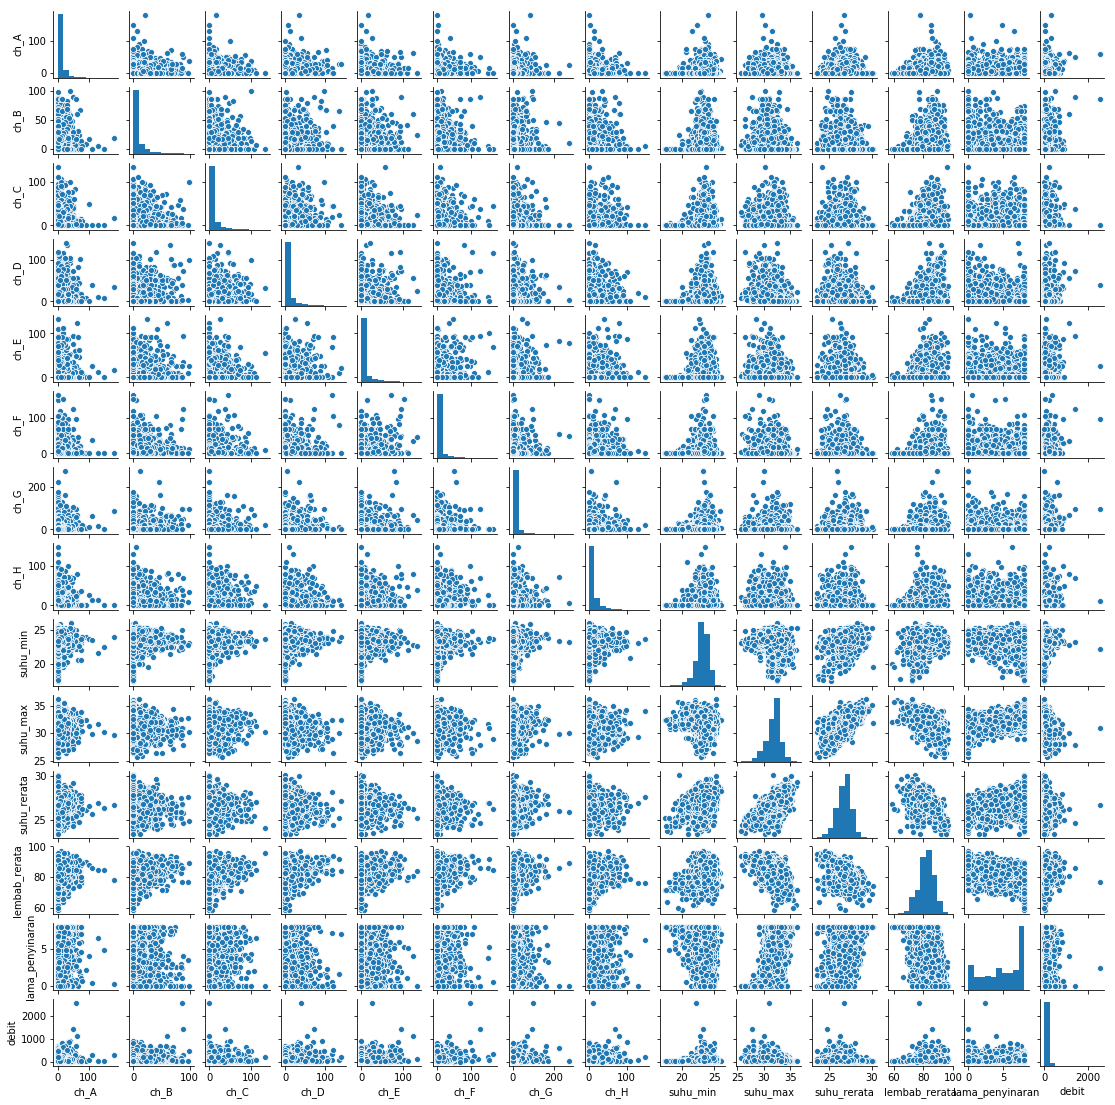

In [0]:
import seaborn as sns
g = sns.pairplot(dataset)
g.fig.set_size_inches(15,15)

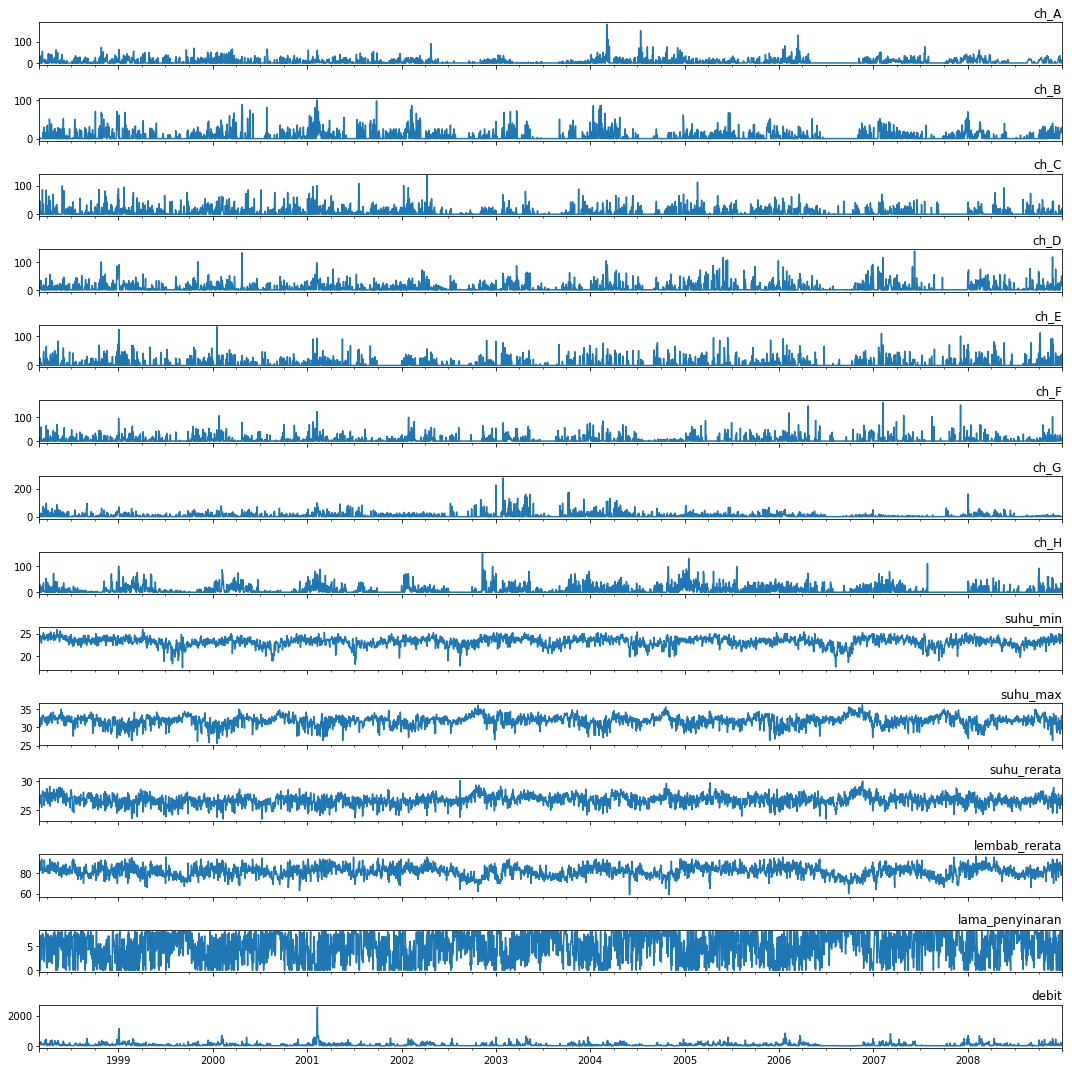

In [0]:
from hidrokit.viz import graph
graph.subplots(dataset, ncols=1, nrows=14, figsize=(15, 15));

Dari grafik diatas dapat beberapa informasi baru yang diperoleh berupa:

- Terlihat nilai luaran _outlier_ pada kolom debit yang terjadi di sekitar tahun 2001. 
- Untuk data hujan, hanya pada stasiun G yang memiliki rentang nilai dari 0-200, sedangkan yang lain bernilai 0-100.

Nilai luaran akan disertakan dalam pemodelan. Dan pada akhir tahap ini, diasumsikan bahwa dataset sudah terverifikasi dan tervalidasi disertai selesai melewati prapemrosesan data. Sehingga, pada tahap berikutnya, dataset akan dianggap sudah memenuhi kriteria untuk pemodelan.

# TAHAP 3: INPUT PEMODELAN

Pada tahap ini akan fokus dalam persiapan input pemodelan. Langkah yang akan dilakukan antara lain:

1. Membagi dataset menjadi dua bagian yaitu _train set_ dan _test set_.
1. Normalisasi/Standarisasi nilai pada dataset.
1. Mempersiapkan _input tensor_ untuk masing-masing _train set_ dan _test set_.

## Menentukan _train set_ dan _test set_

Sudah direncanakan bahwa untuk _train set_ menggunakan periode selama 8 tahun sedangkan _test set_ selama 2 tahun. Sehingga diperoleh pembagian sebagai berikut:

- `train_set`, dari 1 Maret 1998 hingga 31 Desember 2006 (~8 tahun / 3228 hari).
- `test_set`, dari 1 Januari 2007 hingga 31 Desember 2008 (2 tahun / 731 hari).

In [0]:
#@title Menentukan `train_set` dan `test_set`

def _TO_NONE(text):
    if text.lower() == 'none':
        return None
    else:
        return text

#@markdown ### `train_set`

_TRAIN_FROM = "None" #@param {type: "string"}
_TRAIN_TO = "20061231" #@param {type: "string"}

#@markdown ### `test_set`
_TEST_FROM = "20070101" #@param {type: "string"}
_TEST_TO = "None" #@param {type: "string"}

_TRAIN_FROM, _TRAIN_TO = map(_TO_NONE, [_TRAIN_FROM, _TRAIN_TO])
_TEST_FROM, _TEST_TO = map(_TO_NONE, [_TEST_FROM, _TEST_TO])

_SLICE_TRAIN = slice(_TRAIN_FROM, _TRAIN_TO)
_SLICE_TEST = slice(_TEST_FROM, _TEST_TO)

print(f':: Pemotongan Train set dari\t: {str(_TRAIN_FROM):8s} sampai {_TRAIN_TO:8s}')
print(f':: Pemotongan Test set dari\t: {_TEST_FROM:8s} sampai {str(_TEST_TO):8s}')


:: Pemotongan Train set dari	: None     sampai 20061231
:: Pemotongan Test set dari	: 20070101 sampai None    


In [0]:
print(':: DIMENSI TRAIN SET DAN TEST SET')
train_set = dataset.loc[_SLICE_TRAIN].copy()
test_set = dataset.loc[_SLICE_TEST].copy()
print(f':: DIMENSI [train_set]: {train_set.shape}')
print(f':: DIMENSI [test_set]: {test_set.shape}')

:: DIMENSI TRAIN SET DAN TEST SET
:: DIMENSI [train_set]: (3228, 14)
:: DIMENSI [test_set]: (731, 14)


## Normalisasi dataset

Agar pelatihan berlangsung secara efisien, maka seluruh dataset (input dan output) dinormalisasikan dengan cara mengurangi dengan nilai rerata dan dibagi oleh standard deviasi (LeCun et al., 2012; Minns and Hall, 1996) sebagaimana disebutkan pada makalah Kratzert et al. (2018).

Normalisasi menggunakan scikit-learn `StandardScaler` ([referensi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). Parameter objek `StandardScaler` hanya mengacu pada `train_set`.

### Train set

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print(':: NORMALISASI DATAFRAME [train_set] MENJADI [train_set_scale]')
train_set_scale = train_set.copy()
train_set_scale[:] = sc.fit_transform(train_set[:])

:: NORMALISASI DATAFRAME [train_set] MENJADI [train_set_scale]


In [0]:
print(':: MENAMPILKAN SAMPLE DATASET [train_set_scale]')
train_set_scale.sample(5, axis=0).sample(5, axis=1)

:: MENAMPILKAN SAMPLE DATASET [train_set_scale]


,ch_F,suhu_rerata,ch_G,ch_A,ch_C
2004-12-20,0.135552,0.652575,0.114218,1.130425,-0.467389
1999-12-17,3.800097,-2.585187,0.490628,-0.472120,1.307047
1998-09-13,-0.410231,0.883843,-0.477285,-0.225575,-0.467389
1999-12-10,-0.176324,0.305672,-0.047101,-0.061211,0.952160
2003-03-31,-0.410231,0.999478,-0.477285,-0.472120,-0.467389


### Test set

Normalisasi pada _test set_ menggunakan parameter dari _train set_.

In [0]:
print(':: NORMALISASI DATAFRAME [test_set] MENJADI [test_set_scale]')
test_set_scale = test_set.copy()
test_set_scale[:] = sc.transform(test_set[:])

:: NORMALISASI DATAFRAME [test_set] MENJADI [test_set_scale]


In [0]:
print(':: MENAMPILKAN SAMPLE DATASET [test_set_scale]')
test_set_scale.sample(5, axis=0).sample(5, axis=1)

:: MENAMPILKAN SAMPLE DATASET [test_set_scale]


,ch_B,ch_F,debit,ch_C,suhu_max
2007-07-12,-0.476333,-0.410231,-0.539789,-0.467389,-0.748948
2008-06-08,-0.476333,-0.410231,-0.529627,-0.467389,-0.028437
2008-05-19,-0.081408,0.837274,-0.516454,-0.467389,0.547973
2008-08-25,-0.476333,0.759305,-0.167470,1.803890,-0.172539
2008-05-06,-0.476333,1.071181,-0.458494,1.023137,0.115666


## INPUT TENSOR

Setelah melakukan proses normalisasi, maka `train_set` harus ditransformasi ke dalam bentuk tensor 3 dimensi. Dalam pemodelan RNN dimensi input berupa tensor 3 dimensi sebagai `(batch_size, timesteps, input_dim)` ([referensi](https://keras.io/layers/recurrent/)). 

Berdasarkan Kratzert et al. (2018), ___timesteps_ yang digunakan sebesar `TIMESTEPS=365` hari__. Nilai tersebut digunakan untuk dapat menangkap setidaknya siklus tahunan. Pada buku ini juga akan menggunakan nilai yang sama.

Proses transformasi ini akan menggunakan modul `hidrokit.contrib.taruma.hk53` ([panduan](https://nbviewer.jupyter.org/gist/taruma/50460ebfaab5a30c41e7f1a1ac0853e2)).

In [0]:
#@title Menentukan `TIMESTEPS`

#@markdown Satuan `TIMESTEPS` adalah hari.

TIMESTEPS = 365 #@param {type:"integer"}

print(':: MENENTUKAN [TIMESTEPS]')
print(f':: [TIMESTEPS] = {TIMESTEPS} hari')

:: MENENTUKAN [TIMESTEPS]
:: [TIMESTEPS] = 365 hari


In [0]:
print(':: MENENTUKAN INPUT COLUMNS DAN OUTPUT COLUMNS')
feature_columns = dataset.columns.to_list()[:-1]
output_columns = ['debit']
print(f':: INPUT COLUMNS = {feature_columns}')
print(f':: OUTPUT COLUMNS = {output_columns}')

:: MENENTUKAN INPUT COLUMNS DAN OUTPUT COLUMNS
:: INPUT COLUMNS = ['ch_A', 'ch_B', 'ch_C', 'ch_D', 'ch_E', 'ch_F', 'ch_G', 'ch_H', 'suhu_min', 'suhu_max', 'suhu_rerata', 'lembab_rerata', 'lama_penyinaran']
:: OUTPUT COLUMNS = ['debit']


### Train Set

In [0]:
from hidrokit.contrib.taruma import hk53

print(':: TRANSFORMASI TRAIN SET')
print(f':: DIMENSI [train_set_scale] = {train_set_scale.shape}')
print(':: TRANSFORMASI [train_set_scale] MENJADI [X_train] DAN [y_train]')
X_train, y_train = hk53.tensor_array(
    train_set_scale, X_columns=feature_columns, 
    timesteps=TIMESTEPS, y_out=True, y_columns=output_columns
)
print(f':: DIMENSI [X_train] = {X_train.shape}')
print(f':: DIMENSI [y_train] = {y_train.shape}')

:: TRANSFORMASI TRAIN SET
:: DIMENSI [train_set_scale] = (3228, 14)
:: TRANSFORMASI [train_set_scale] MENJADI [X_train] DAN [y_train]
:: DIMENSI [X_train] = (2863, 365, 13)
:: DIMENSI [y_train] = (2863,)


### Test Set

In [0]:
print(':: TRANSFORMASI TEST SET')
print(f':: DIMENSI [test_set_scale] = {test_set_scale.shape}')
print(':: TRANSFORMASI [test_set_scale] MENJADI [X_test] DAN [y_test]')
X_test, y_test = hk53.tensor_array(
    test_set_scale, X_columns=feature_columns,
    timesteps=TIMESTEPS, y_out=True, y_columns=output_columns
)
print(f':: DIMENSI [X_test] = {X_test.shape}')
print(f':: DIMENSI [y_test] = {y_test.shape}')

:: TRANSFORMASI TEST SET
:: DIMENSI [test_set_scale] = (731, 14)
:: TRANSFORMASI [test_set_scale] MENJADI [X_test] DAN [y_test]
:: DIMENSI [X_test] = (366, 365, 13)
:: DIMENSI [y_test] = (366,)


# TAHAP 4: MELATIH MODEL

Pada tahap ini, akan mempersiapkan arsitektur RNN/LSTM disertai melakukan pelatihan (_training_) model.

Demi mempersingkat buku, parameter yang digunakan adalah **dua layer dan 20 sel** dengan setiap layer diberi _Dropout_ layer dengan probabilitas 10% (meniru makalah Kratzert et al. (2018)).

In [0]:
print(':: IMPORT TENSORFLOW.KERAS LIBRARY')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

:: IMPORT TENSORFLOW.KERAS LIBRARY


Dalam bidang hidrologi, kasus curah hujan-limpasan dapat dievaluasi dengan berbagai metrik, metrik yang biasa digunakan adalah Nash-Sutcliffe Efficiency ([referensi](https://en.wikipedia.org/wiki/Nash–Sutcliffe_model_efficiency_coefficient)). Karena evaluasi metrik ingin dilakukan setiap epoch, maka dari itu dibuat fungsi khusus agar disertakan saat `compile` model.

Untuk evaluasi metrik sebenarnya sudah tersedia paket [HydroErr](https://github.com/BYU-Hydroinformatics/HydroErr) yang dibuat oleh BYU Hydroinformatics (tersedia juga paket [HydroStats](https://github.com/BYU-Hydroinformatics/Hydrostats) untuk menelaah data hidrologi). Karena objek yang diterima pada metrik `keras` harus berupa `tensorflow` harus dibuat fungsi khusus tersendiri.

In [0]:
import tensorflow.keras.backend as K

print(':: MEMBUAT FUNGSI KHUSUS METRIK (NSE, NSE_MOD, R_SQUARED)')

def nse(y_true, y_pred):
    # ref: https://hydroerr.readthedocs.io/en/stable/api/HydroErr.HydroErr.nse.html
    S, O = y_pred, y_true
    O_mean = K.mean(O)
    top = K.sum(K.square(S-O))
    bot = K.sum(K.square(O-O_mean))
    NSE = 1 - (top / bot)
    return NSE

def nse_mod(y_true, y_pred, j=1):
    # ref: https://hydroerr.readthedocs.io/en/stable/api/HydroErr.HydroErr.nse_mod.html
    S, O = y_pred, y_true
    O_mean = K.mean(O)
    abs_top = K.abs(S-O)
    abs_bot = K.abs(O-O_mean)
    top = K.sum(K.pow(abs_top, j))
    bot = K.sum(K.pow(abs_bot, j))
    NSE_mod = 1 - (top / bot)
    return NSE_mod

def r_squared(y_true, y_pred):
    # ref: https://hydroerr.readthedocs.io/en/stable/api/HydroErr.HydroErr.r_squared.html
    S, O = y_pred, y_true
    O_mean = K.mean(O)
    S_mean = K.mean(S)

    _top = (O-O_mean) * (S-S_mean)
    top = K.square(K.sum(_top))

    bot = K.sum(K.square(O-O_mean)) * K.sum(K.square(S-S_mean))

    R_squared = top / bot
    return R_squared

:: MEMBUAT FUNGSI KHUSUS METRIK (NSE, NSE_MOD, R_SQUARED)


Pada evaluasi metrik, digunakan empat fungsi yaitu _mean absolute error_ `mae`, _Nash–Sutcliffe Efficiency_ `nse` , _Modified NSE_ `nse_mod`, _Coefficient of Determination_ `r_squared`, dan _mean squared error_ `mse` sebagai _loss function_.

In [0]:
def build_model(
    input_shape, optimizer='adam', activation='sigmoid', p=0.1,
    units=20, loss='mse'
):
    model = Sequential()

    # FIRST LAYER
    model.add(LSTM(units=units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(rate=p))

    # SECOND LAYER
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(rate=p))

    # OUTPUT LAYER
    model.add(Dense(1))

    # COMPILE
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae', nse, nse_mod, r_squared])

    return model

print(':: PEMODELAN RNN')
model = build_model(input_shape=(TIMESTEPS, X_train.shape[2]))
print(':: SUMMARY [model]:')
model.summary()

:: PEMODELAN RNN
:: SUMMARY [model]:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 365, 20)           2720      
_________________________________________________________________
dropout (Dropout)            (None, 365, 20)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 6,021
Trainable params: 6,021
Non-trainable params: 0
_________________________________________________________________


In [0]:
_before_train_time = datetime.now(timezone(timedelta(hours=7)))
print(f':: TRAINING START: {_before_train_time.strftime("%Y%m%d %H:%M")}')

:: TRAINING START: 20191022 08:09


Pada buku ini hanya akan dilakukan sebanyak `epochs=50` dengan `batch_size=30`.

In [0]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, verbose=1)

In [0]:
_after_train_time = datetime.now(timezone(timedelta(hours=7)))
print(f':: TRAINING FINISH: {_after_train_time.strftime("%Y%m%d %H:%M")}')

:: TRAINING FINISH: 20191022 08:28


In [0]:
print(':: MODEL SELESAI DILATIH')
_duration_train_time = _after_train_time - _before_train_time
print(f':: DURASI: {_duration_train_time}')

:: MODEL SELESAI DILATIH
:: DURASI: 0:18:57.397631


# Tahap 5: EVALUASI MODEL

Tahap ini akan membahas hasil pelatihan model. Langkah yang akan dilakukan antara lain:

- Mengevaluasi metrik yang telah tercatat dalam `history`.
- Mengembalikan hasil normalisasi menjadi nilai sebenarnya.
- Mengevaluasi _train set_
- Mengevaluasi _test set_ 

## Metrik

Terdapat 5 metrik yang telah tercatat yaitu:

- _mean squared error_ yang digunakan sebagai _loss function_ `loss`: $0 \leq MSE \leq \infty$, semakin kecil semakin baik.
- _mean absolute error_ `mae`: $0 \leq MAE \leq \infty$, semakin kecil semakin baik.
- _Nash-Sutcliffe Efficiency_ `nse`: $-\infty \leq NSE < 1$, semakin besar semakin baik. 
- _Modified NSE_ `nse_mod`: $-\infty \leq NSE\_MOD < 1$, semakin besar semakin baik. 
- _Coefficient of Determination_ `r_squared`: $0 \leq R^2 \leq 1$, dengan nilai 1 menandakan data berkorelasi sempurna (data prediksi sama persis dengan data sebenarnya). 

In [0]:
print(':: MENYIMPAN HISTORY METRIK DALAM BENTUK DATAFRAME')
df_metric = pd.DataFrame(history.history)
print(':: METRIK DISIMPAN DI [df_metric]')
df_metric.rename(columns={'loss':'mse'}, inplace=True)
print(':: MENAMPILKAN [df_metric]')
df_metric.head()

:: MENYIMPAN HISTORY METRIK DALAM BENTUK DATAFRAME
:: METRIK DISIMPAN DI [df_metric]
:: MENAMPILKAN [df_metric]


,mse,mae,nse,nse_mod,r_squared
0,0.781758,0.484053,0.124985,0.132563,0.235792
1,0.692471,0.448786,0.198317,0.193541,0.324584
2,0.627708,0.432311,0.201291,0.203872,0.370504
3,0.595955,0.428561,0.261062,0.219740,0.407329
4,0.583112,0.417041,0.268653,0.238746,0.410968


:: GRAFIK METRIK


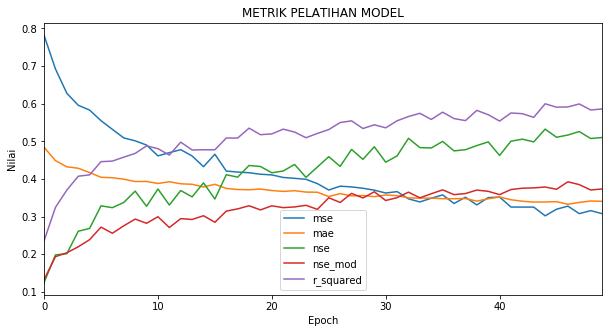

In [0]:
print(':: GRAFIK METRIK')
df_metric.plot(figsize=(10,5))
plt.title('METRIK PELATIHAN MODEL')
plt.xlabel('Epoch')
plt.ylabel('Nilai');

Dapat dilihat pada grafik, pada setiap epochnya model masih terus membaik, sehingga dimungkinkan untuk melanjutkan pelatihan lebih dari 50 epoch.

## Object `StandardScaler` untuk kolom debit

Karena proses normalisasi data dilakukan sebelum pemisahan _train set_ dan _test set_, maka harus dibuat objek `StandardScaler` baru yang mengambil atribut objek `sc` pada kolom debit (y_train/y_test).

In [0]:
print(':: OBJEK StandardScaler UNTUK OUTPUT [y_train] DAN [y_test]')
sc_y = StandardScaler()
sc_y.scale_, sc_y.mean_, sc_y.var_, sc_y.n_sample_seen_ = sc.scale_[-1], sc.mean_[-1], sc.var_[-1], sc.n_samples_seen_

:: OBJEK StandardScaler UNTUK OUTPUT [y_train] DAN [y_test]


## Evaluasi _train set_

Meski mengevaluasi train set sudah tersampaikan melalui metrik diatas, saya ingin melihat bagaimana model berhasil memprediksikan data train set setiap harinya.

In [0]:
print(':: MENYIMPAN EVALUASI TRAIN SET [df_eval_train]')
df_eval_train = pd.DataFrame(
    data=dict(
        true=sc_y.inverse_transform(y_train),
        pred=sc_y.inverse_transform(model.predict(X_train).flatten())
    ),
    index=train_set.index[TIMESTEPS:]
)
print(':: MENAMPILKAN [df_eval_train]')
df_eval_train.head()

:: MENYIMPAN EVALUASI TRAIN SET [df_eval_train]
:: MENAMPILKAN [df_eval_train]


,true,pred
1999-03-01,376.00,334.103973
1999-03-02,282.00,301.464172
1999-03-03,188.00,151.581390
1999-03-04,23.15,65.298645
1999-03-05,23.15,54.322853


:: GRAFIK DEBIT ALIRAN MENGGUNAKAN TRAIN SET


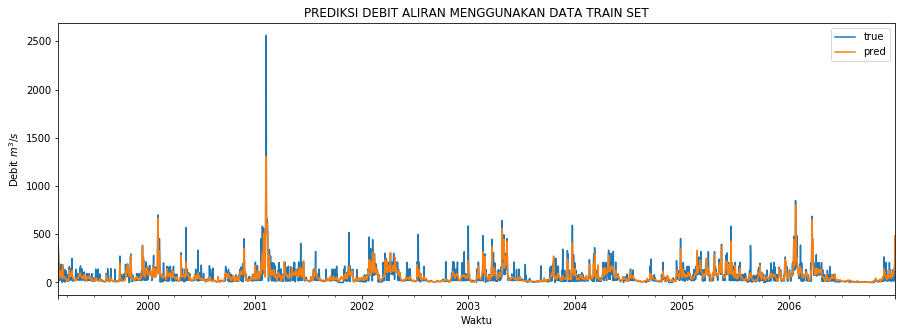

In [0]:
print(':: GRAFIK DEBIT ALIRAN MENGGUNAKAN TRAIN SET')
df_eval_train.plot(figsize=(15,5))
plt.title('PREDIKSI DEBIT ALIRAN MENGGUNAKAN DATA TRAIN SET')
plt.ylabel('Debit $m^3/s$')
plt.xlabel('Waktu');

Sejauh ini model mampu memprediksikannya dengan cukup memuaskan. Model mampu melihat kejadian peningkatan ataupun penurunan debit. Tentunya, mengevaluasi data _train set_ tidak begitu signifikan, dikarenakan model memang sudah dilatih berdasarkan data _train set_, tidak aneh jika pemodelannya memuaskan.

## Evaluasi _test set_

Performa model dapat dievaluasi menggunakan data _test set_, dimana data tersebut tidak terlihat sama sekali oleh model.

Evaluasi dilakukan dengan mengukur 5 metrik yang dilakukan serupa pada saat pelatihan (mse, mae, nse, nse_mod, dan r_squared). Perhitungan metrik akan menggunakan paket HydroErr.

In [0]:
print(':: MENYIMPAN EVALUASI TEST SET [df_eval_test]')
df_eval_test = pd.DataFrame(
    data=dict(
        true=sc_y.inverse_transform(y_test),
        pred=sc_y.inverse_transform(model.predict(X_test).flatten())
    ),
    index=test_set.index[TIMESTEPS:]
)
print(':: MENAMPILKAN [df_eval_test]')
df_eval_test.head()

:: MENYIMPAN EVALUASI TEST SET [df_eval_test]
:: MENAMPILKAN [df_eval_test]


,true,pred
2008-01-01,76.03,50.311241
2008-01-02,679.00,56.357487
2008-01-03,632.00,189.934631
2008-01-04,408.00,151.144196
2008-01-05,465.00,209.659058


:: GRAFIK DEBIT ALIRAN MENGGUNAKAN TEST SET


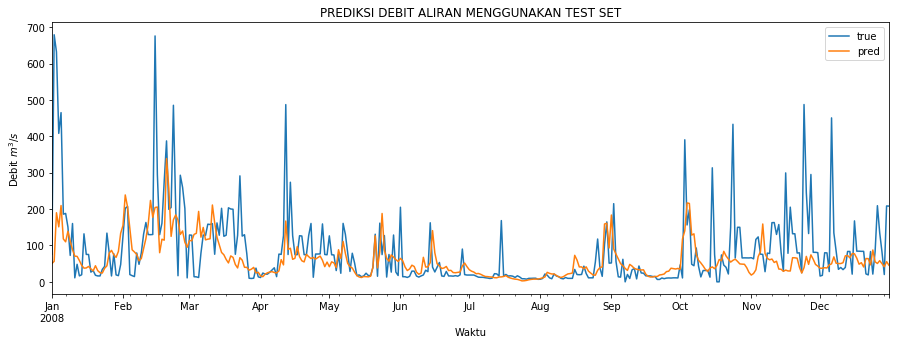

In [0]:
print(':: GRAFIK DEBIT ALIRAN MENGGUNAKAN TEST SET')
df_eval_test.plot(figsize=(15,5))
plt.title('PREDIKSI DEBIT ALIRAN MENGGUNAKAN TEST SET')
plt.ylabel('Debit $m^3/s$')
plt.xlabel('Waktu');

Hasil prediksi debit aliran menggunakan data _test set_ masih dibilang tidak tahu pasti bagus tidaknya berdasarkan visualisasi. Terlihat ada beberapa nilai yang meleset dari data observasi, akan tetapi model mampu memprediksikan kondisi kekeringan yang terjadi pada bulan juni hingga agustus.

In [0]:
#@title Periksa Paket HydroErr { display-mode: "form"}
#@markdown Memeriksa paket hidrokit dan memasangnya jika diperlukan

print(':: MEMERIKSA PAKET HYDROERR')
if _IS_LOCALE:
    try:
        import HydroErr
    except ModuleNotFoundError:
        print('HydroErr tidak ditemukan')
else:
    try:
        import HydroErr
        print(':: PAKET HYDROERR SUDAH TERPASANG')
    except ModuleNotFoundError:
        print(':: INSTALASI PAKET HYDROERR')
        !pip install HydroErr -q

:: MEMERIKSA PAKET HYDROERR
:: INSTALASI PAKET HYDROERR


In [0]:
import HydroErr as he

print(':: MENGHITUNG METRIK DARI TEST SET')
# Menggunakan nilai yang telah dinormalisasikan
_simulated = model.predict(X_test).flatten()
_observed = y_test

test_metric = {
    'mse':he.mse(_simulated, _observed),
    'mae':he.mae(_simulated, _observed),
    'nse':he.nse(_simulated, _observed),
    'nse_mod':he.nse_mod(_simulated, _observed),
    'r_squared':he.r_squared(_simulated, _observed)
}

:: MENGHITUNG METRIK DARI TEST SET


In [0]:
print(':: MENAMPILKAN METRIK TEST SET [test_metric]')
test_metric = pd.Series(test_metric)
test_metric

:: MENAMPILKAN METRIK TEST SET [test_metric]


mse          0.725624
mae          0.474683
nse          0.228164
nse_mod      0.276037
r_squared    0.273061
dtype: float64

In [0]:
print(':: MEMBANDINGKAN METRIK TRAIN SET DAN TEST SET')
df_eval_metric = pd.DataFrame(
    data=[df_metric.iloc[-1], test_metric], index=['train', 'test']
)
df_eval_metric.T

:: MEMBANDINGKAN METRIK TRAIN SET DAN TEST SET


,train,test
mse,0.307810,0.725624
mae,0.340651,0.474683
nse,0.510170,0.228164
nse_mod,0.373428,0.276037
r_squared,0.586090,0.273061


Berdasarkan hasil metrik diatas, prediksi dari data _test set_ tidak begitu bagus sehingga model bisa dibilang masih kurang dilatih.

# KESIMPULAN

Jika melihat dari hasil perhitungan metrik, prediksi yang dihasilkan oleh model tergolong tidak bagus, tidak ada salah satu parameter yang dianggap memuaskan. Akan tetapi, jika dilihat dari grafik antara debit dan waktu (hidrograf), model mampu memprediksikan fluktuasi debit (kondisi kekeringan). 

Dalam buku ini, hanya menampilkan bagaimana pemodelan menggunakan LSTM dilakukan saja. Masih banyak langkah yang dapat dilakukan untuk memperbaiki model sekarang seperti melakukan _parameter tuning_, _model selection_, _feature engineering_. Tentunya, data set yang digunakan harus diperiksa kembali karena dalam buku ini menggunakan asumsi sederhana bahwa data set sudah layak pakai.

# Changelog

```
- 20191022 - 1.0.0 - Initial
```

__Copyright &copy; 2019 [Taruma Sakti Megariansyah](https://taruma.github.io)__


Source code in this notebook is licensed [MIT License](https://github.com/taruma/vivaldi/blob/master/LICENSE). Data in this notebook is licensed [Creative Common Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/). 